In [1]:
import os
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pickle(data, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
data_saved_dir = r'D:\My Code\Classification\pickle_data'
train_val_data_path = os.path.join(data_saved_dir, 'A_training_data.pkl')
train_images, train_labels = load_pickle(train_val_data_path)

In [9]:
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pickle(data, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)
        
data_saved_dir = r'D:\My Code\Classification\pickle_data'
train_val_data_path = os.path.join(data_saved_dir, 'B_training.pkl')
train_images, train_labels = load_pickle(train_val_data_path)

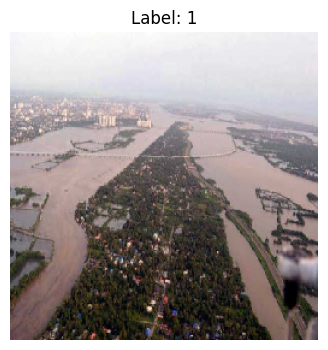

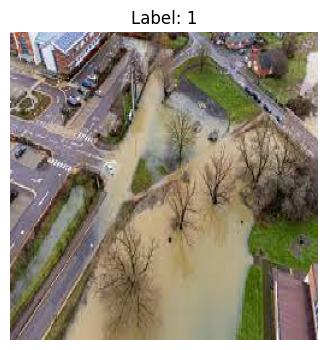

In [10]:
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

display_images(train_images, train_labels, num_images=2)

In [11]:
def augment_images(images, labels, augmented_images, augmented_labels, augmentations=2):
    datagen = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        vertical_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
    )

    for i in range(len(images)):
        x = images[i]
        x = x.reshape((1,) + x.shape)

        for j, batch in enumerate(datagen.flow(x, batch_size=1)):
            augmented_images.append(batch[0])
            augmented_labels.append(labels[i])

            if j >= augmentations:
                break

train_augmented_images = []
train_augmented_labels = []

augment_images(train_images, train_labels, train_augmented_images, train_augmented_labels)

In [19]:
# for dataset A
train_augmented_images = np.array(train_augmented_images)
train_augmented_labels = np.array(train_augmented_labels)


print(f"Training images shape: {train_augmented_images.shape}")
print(f"Training labels shape: {train_augmented_labels.shape}")

Training images shape: (3345, 256, 256, 3)
Training labels shape: (3345,)


In [12]:
# for dataset B
train_augmented_images = np.array(train_augmented_images)
train_augmented_labels = np.array(train_augmented_labels)


print(f"Training images shape: {train_augmented_images.shape}")
print(f"Training labels shape: {train_augmented_labels.shape}")

Training images shape: (5361, 256, 256, 3)
Training labels shape: (5361,)


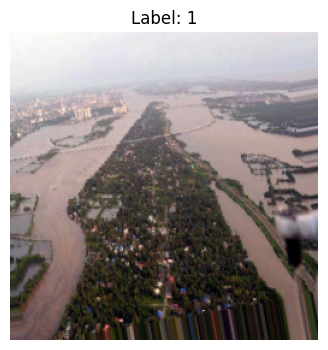

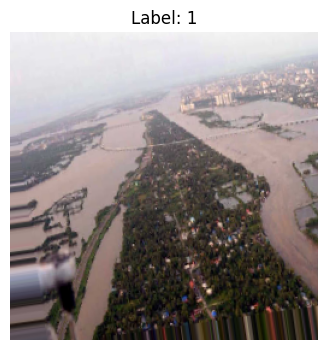

In [16]:
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow((images[i]*255).astype('uint8'))
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

display_images(train_augmented_images, train_augmented_labels, num_images=2)

In [20]:
def save_images_and_labels(images, labels, save_path, prefix="augmented"):
    for i in range(len(images)):
        image = Image.fromarray(images[i])
        label = labels[i]

        label_folder = os.path.join(save_path, str(label))
        os.makedirs(label_folder, exist_ok=True)

        image_path = os.path.join(label_folder, f"{prefix}-{i}.jpg")
        image.save(image_path)

dir = r"D:\Datasets\Classification\B with augmentation"
save_images_and_labels((train_augmented_images*255).astype("uint8"), train_augmented_labels, dir, prefix="augmented")